### Importing modules

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
import os, json, re

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

%matplotlib inline

### Importing Data

In [9]:
data = pd.read_csv("./telecom_churn_data.csv")
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [10]:
# look at the shape of the data
data.shape

(99999, 226)

In [11]:
# look at number of columns
len(list(data.columns))

226

In [12]:
# peek at the data type of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [13]:
# look at data statistics
data.describe(include='all')

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999,99398,98899,98340,99999.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
unique,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,99999,99398,98899,98340,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.001207e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,282.987358,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,328.439770,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,-2258.709000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,93.411500,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,197.704000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,371.060000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000


In [14]:
initial_column_list = list(data.columns)

id_column_list = ['mobile_number', 'circle_id']

date_column_list = ['last_date_of_month_6',
                     'last_date_of_month_7',
                     'last_date_of_month_8',
                     'last_date_of_month_9',
                     'date_of_last_rech_6',
                     'date_of_last_rech_7',
                     'date_of_last_rech_8',
                     'date_of_last_rech_9',
                     'date_of_last_rech_data_6',
                     'date_of_last_rech_data_7',
                     'date_of_last_rech_data_8',
                     'date_of_last_rech_data_9'
                    ]

cat_column_list =  ['night_pck_user_6',
                     'night_pck_user_7',
                     'night_pck_user_8',
                     'night_pck_user_9',
                     'fb_user_6',
                     'fb_user_7',
                     'fb_user_8',
                     'fb_user_9'
                    ]

### Removing Redundant columns

In [15]:
# Removing Date and Id Columns
data = data.drop(columns = id_column_list + date_column_list)
data.shape

(99999, 212)

In [16]:
# checking columns with single value in all the columns and the corresponding single value
columns_with_single_value = {}
for x in data.columns:
    if len(data[x].value_counts()) == 1:
        columns_with_single_value[x]=list(dict(data[x].value_counts()).keys())[0]
columns_with_single_value

{'loc_og_t2o_mou': 0.0,
 'std_og_t2o_mou': 0.0,
 'loc_ic_t2o_mou': 0.0,
 'std_og_t2c_mou_6': 0.0,
 'std_og_t2c_mou_7': 0.0,
 'std_og_t2c_mou_8': 0.0,
 'std_og_t2c_mou_9': 0.0,
 'std_ic_t2o_mou_6': 0.0,
 'std_ic_t2o_mou_7': 0.0,
 'std_ic_t2o_mou_8': 0.0,
 'std_ic_t2o_mou_9': 0.0}

In [17]:
data = data.drop(columns = columns_with_single_value.keys())
data.shape

(99999, 201)

### Handle Missing Values

In [18]:
# print list of missing columns 
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]

onnet_mou_6            3937
onnet_mou_7            3859
onnet_mou_8            5378
onnet_mou_9            7745
offnet_mou_6           3937
offnet_mou_7           3859
offnet_mou_8           5378
offnet_mou_9           7745
roam_ic_mou_6          3937
roam_ic_mou_7          3859
roam_ic_mou_8          5378
roam_ic_mou_9          7745
roam_og_mou_6          3937
roam_og_mou_7          3859
roam_og_mou_8          5378
roam_og_mou_9          7745
loc_og_t2t_mou_6       3937
loc_og_t2t_mou_7       3859
loc_og_t2t_mou_8       5378
loc_og_t2t_mou_9       7745
loc_og_t2m_mou_6       3937
loc_og_t2m_mou_7       3859
loc_og_t2m_mou_8       5378
loc_og_t2m_mou_9       7745
loc_og_t2f_mou_6       3937
loc_og_t2f_mou_7       3859
loc_og_t2f_mou_8       5378
loc_og_t2f_mou_9       7745
loc_og_t2c_mou_6       3937
loc_og_t2c_mou_7       3859
loc_og_t2c_mou_8       5378
loc_og_t2c_mou_9       7745
loc_og_mou_6           3937
loc_og_mou_7           3859
loc_og_mou_8           5378
loc_og_mou_9        

In [19]:
na_list = list(dict(data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]).keys())
len(na_list)

144

In [20]:
zero_impute_list = [x for x in na_list if x not in date_column_list and x not in cat_column_list]
zero_impute_list

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'std_og_mou_9',


As we can see from above all the colummns in the zero_impute_list are either counts, rechaege, mou or data<br>
NaN in the above columns means that there is no count or no recharge done<br>
so we can impute 0 in all the above columns

In [21]:
# imputing with 0 for recharge, cont, mou, data columns
data[zero_impute_list] = data[zero_impute_list].fillna(0)

In [22]:
# print list of missing columns 
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]

night_pck_user_6    74846
night_pck_user_7    74428
night_pck_user_8    73660
night_pck_user_9    74077
fb_user_6           74846
fb_user_7           74428
fb_user_8           73660
fb_user_9           74077
dtype: int64

Removed all the missing values from the data
### Handling Data Types

In [23]:
# Handling categorical columns (filling -1 in place of na)
data[cat_column_list] = data[cat_column_list].fillna(-1)

In [24]:
data.isna().sum()[(data.isna().sum()/len(data.index))*100 > 0]/len(data.isna())

Series([], dtype: float64)

In [25]:
cat_column_list_2 = [x for x in cat_column_list if x in data.columns]
data[cat_column_list_2] = data[cat_column_list_2].apply(lambda column: column.astype("category"), axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 201 entries, arpu_6 to sep_vbc_3g
dtypes: category(8), float64(160), int64(33)
memory usage: 148.0 MB


### Creating Target Variable

In [26]:
# usage based column creating

data["usage_mou_6"] = data.total_og_mou_6 + data.total_ic_mou_6
data["usage_mou_7"] = data.total_og_mou_7 + data.total_ic_mou_7
data["usage_mou_8"] = data.total_og_mou_8 + data.total_ic_mou_8
data["usage_mou_9"] = data.total_og_mou_9 + data.total_ic_mou_9

data["usage_data_6"] = data.monthly_3g_6 + data.monthly_2g_6
data["usage_data_7"] = data.monthly_3g_7 + data.monthly_2g_7
data["usage_data_8"] = data.monthly_3g_8 + data.monthly_2g_8
data["usage_data_9"] = data.monthly_3g_9 + data.monthly_2g_9

data["usage_6"] = data.usage_data_6 + data.usage_mou_6
data["usage_7"] = data.usage_data_7 + data.usage_mou_7
data["usage_8"] = data.usage_data_8 + data.usage_mou_8
data["usage_9"] = data.usage_data_9 + data.usage_mou_9

In [27]:
# Creating Columns That show the difference betweenthe 8th month and the average of values of the 6th and 7th month

data['arpu_diff'] = data.arpu_8 - ((data.arpu_6 + data.arpu_7)/2)
data['onnet_mou_diff'] = data.onnet_mou_8 - ((data.onnet_mou_6 + data.onnet_mou_7)/2)
data['offnet_mou_diff'] = data.offnet_mou_8 - ((data.offnet_mou_6 + data.offnet_mou_7)/2)
data['roam_ic_mou_diff'] = data.roam_ic_mou_8 - ((data.roam_ic_mou_6 + data.roam_ic_mou_7)/2)
data['roam_og_mou_diff'] = data.roam_og_mou_8 - ((data.roam_og_mou_6 + data.roam_og_mou_7)/2)
data['loc_og_mou_diff'] = data.loc_og_mou_8 - ((data.loc_og_mou_6 + data.loc_og_mou_7)/2)
data['std_og_mou_diff'] = data.std_og_mou_8 - ((data.std_og_mou_6 + data.std_og_mou_7)/2)
data['isd_og_mou_diff'] = data.isd_og_mou_8 - ((data.isd_og_mou_6 + data.isd_og_mou_7)/2)
data['spl_og_mou_diff'] = data.spl_og_mou_8 - ((data.spl_og_mou_6 + data.spl_og_mou_7)/2)
data['total_og_mou_diff'] = data.total_og_mou_8 - ((data.total_og_mou_6 + data.total_og_mou_7)/2)
data['loc_ic_mou_diff'] = data.loc_ic_mou_8 - ((data.loc_ic_mou_6 + data.loc_ic_mou_7)/2)
data['std_ic_mou_diff'] = data.std_ic_mou_8 - ((data.std_ic_mou_6 + data.std_ic_mou_7)/2)
data['isd_ic_mou_diff'] = data.isd_ic_mou_8 - ((data.isd_ic_mou_6 + data.isd_ic_mou_7)/2)
data['spl_ic_mou_diff'] = data.spl_ic_mou_8 - ((data.spl_ic_mou_6 + data.spl_ic_mou_7)/2)
data['total_ic_mou_diff'] = data.total_ic_mou_8 - ((data.total_ic_mou_6 + data.total_ic_mou_7)/2)
data['total_rech_num_diff'] = data.total_rech_num_8 - ((data.total_rech_num_6 + data.total_rech_num_7)/2)
data['total_rech_amt_diff'] = data.total_rech_amt_8 - ((data.total_rech_amt_6 + data.total_rech_amt_7)/2)
data['max_rech_amt_diff'] = data.max_rech_amt_8 - ((data.max_rech_amt_6 + data.max_rech_amt_7)/2)
data['total_rech_data_diff'] = data.total_rech_data_8 - ((data.total_rech_data_6 + data.total_rech_data_7)/2)
data['max_rech_data_diff'] = data.max_rech_data_8 - ((data.max_rech_data_6 + data.max_rech_data_7)/2)
data['av_rech_amt_data_diff'] = data.av_rech_amt_data_8 - ((data.av_rech_amt_data_6 + data.av_rech_amt_data_7)/2)
data['vol_2g_mb_diff'] = data.vol_2g_mb_8 - ((data.vol_2g_mb_6 + data.vol_2g_mb_7)/2)
data['vol_3g_mb_diff'] = data.vol_3g_mb_8 - ((data.vol_3g_mb_6 + data.vol_3g_mb_7)/2)

In [28]:
# checking the shape of column upon which we derived target variable
data[data["usage_9"] == 0.0].shape

(10396, 236)

In [29]:
# creating churn column based on 9th month data

data["churn"] = data["usage_9"].apply(lambda x: 1 if x == 0.0 else 0)

In [30]:
# checking out churn counts
data.churn.value_counts()

0    89603
1    10396
Name: churn, dtype: int64

### Removing 9th month columns

In [31]:
# detecting all columns with _9 in their name
september_columns = [x for x in data.columns if x.endswith("_9")]
# september_columns

In [32]:
cat_column_list_3 = [x for x in cat_column_list_2 if x not in september_columns]

In [33]:
# dropping september columns from data
data = data.drop(columns=september_columns)
data.shape

(99999, 185)

### Percentage of churn

In [34]:
# getting percentage of customers with churn

(data.churn.value_counts()/len(data.churn))*100

0    89.603896
1    10.396104
Name: churn, dtype: float64

there is approximately <b>10.40%</b> of churn

### Filtering High Value Customers

In [35]:
# creating total revenue for the customer for each month

data["total_value_6"] = (data.av_rech_amt_data_6 * data.total_rech_data_6) + data.total_rech_amt_6
data["total_value_7"] = (data.av_rech_amt_data_7 * data.total_rech_data_7) + data.total_rech_amt_7
data["total_value_8"] = (data.av_rech_amt_data_8 * data.total_rech_data_7) + data.total_rech_amt_8

In [36]:
# getting the 70th percentile value according to the criterioin given

percentile_value_70 = np.percentile((data["total_value_6"] + data["total_value_7"])/2, 70)
percentile_value_70

478.0

In [37]:
# filtering high value customers

hvc = data[(data["total_value_6"] + data["total_value_7"])/2 > percentile_value_70]
hvc.shape

(29953, 188)

There are 29953 high value customers according to the criteria determined

In [38]:
# getting percentage of customers with churn

(hvc.churn.value_counts()/len(hvc.churn))*100

0    91.546757
1     8.453243
Name: churn, dtype: float64

There is <b>8.5%</b> churn in high value customers

In [39]:
list(hvc.columns)

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

### Target Variable Analysis

In [40]:
# value counts of the churn

hvc.churn.value_counts()

0    27421
1     2532
Name: churn, dtype: int64

<AxesSubplot:xlabel='churn', ylabel='count'>

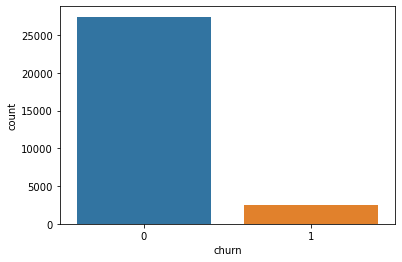

In [41]:
#plot churn

sns.countplot(hvc.churn)

In [42]:
# percentage of the churn

(hvc.churn.value_counts()/len(hvc.churn))*100

0    91.546757
1     8.453243
Name: churn, dtype: float64

### Removing Outliers
Removing the outliers from the data selectively from the above box plots

In [43]:
num_columns_list = [x for x in hvc.columns if x not in cat_column_list_2]
num_columns_list.remove("churn")

In [44]:
from sklearn.neighbors import LocalOutlierFactor

print("shape before removing outliers ", hvc.shape )

lof = LocalOutlierFactor()
yhat = lof.fit_predict(hvc[num_columns_list])
mask = yhat != -1

hvc = hvc[mask]
print("shape after removing outliers ", hvc.shape )

shape before removing outliers  (29953, 188)
shape after removing outliers  (28041, 188)


### Data Preparation

In [45]:
# splitting data into train and test sets
# since there is class imbalance we are using stratify option

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(hvc.drop(columns="churn"), hvc.churn, train_size=0.75, random_state=42, stratify = hvc.churn)

In [46]:
hvc.churn.value_counts()/len(hvc)

0    0.917086
1    0.082914
Name: churn, dtype: float64

In [47]:
y_train.value_counts()/len(y_train)

0    0.917071
1    0.082929
Name: churn, dtype: float64

In [48]:
y_test.value_counts()/len(y_test)

0    0.91713
1    0.08287
Name: churn, dtype: float64

### Data Scaling

In [49]:
# Using Standard Scaling for numerical columns only

from sklearn.preprocessing import StandardScaler

scaling = StandardScaler()
x_train[num_columns_list] = scaling.fit_transform(x_train[num_columns_list])
x_test[num_columns_list] = scaling.transform(x_test[num_columns_list])
x_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,total_rech_amt_diff,max_rech_amt_diff,total_rech_data_diff,max_rech_data_diff,av_rech_amt_data_diff,vol_2g_mb_diff,vol_3g_mb_diff,total_value_6,total_value_7,total_value_8
72122,0.225901,-1.494375,-1.272164,1.948514,-0.583453,-0.540940,-0.666371,-0.783855,-0.728827,-0.229471,...,-0.877129,-0.832673,-0.871827,-0.084420,-0.229027,-0.341289,0.010568,0.051285,-0.828898,-0.756302
11089,1.268804,0.510196,0.475090,0.276977,-0.246655,-0.148178,-0.016001,0.015543,0.255599,-0.144272,...,-0.625148,0.318163,0.543220,0.517580,1.452491,-0.116760,1.214000,0.195939,-0.057456,0.101045
77026,-0.377083,-0.119288,0.029340,-0.353431,-0.167986,-0.166251,-0.012951,0.099064,0.208065,-0.229471,...,0.371452,0.401024,0.071537,0.088568,0.097019,0.093938,0.010568,-0.522316,-0.400722,-0.298783
35140,-0.415350,-0.290818,3.782251,-0.569723,-0.333225,2.244124,-0.293045,-0.403241,0.163822,-0.229471,...,5.256773,1.105336,0.071537,0.088568,0.097019,0.093938,0.010568,-0.555763,-0.423220,1.055343
62801,-0.123816,0.429343,0.752835,-0.426503,-0.404153,-0.405142,0.289156,1.200099,1.211072,-0.229471,...,0.876830,0.087996,0.071537,0.088568,0.097019,0.093938,0.010568,-0.371809,-0.269367,-0.011131


### Dimentionality Reduction with PCA

In [50]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(x_train[num_columns_list])

PCA()

In [51]:
var_explain = {k:v*100 for (k,v) in dict(zip(num_columns_list, pca.explained_variance_ratio_)).items() if v*100 > .2}
var_explain

{'arpu_6': 11.901121842297991,
 'arpu_7': 9.68079631440021,
 'arpu_8': 5.6550082364735035,
 'onnet_mou_6': 5.200544466209937,
 'onnet_mou_7': 4.533693367740935,
 'onnet_mou_8': 3.2389592713810886,
 'offnet_mou_6': 2.6427474462702865,
 'offnet_mou_7': 2.5725593808624643,
 'offnet_mou_8': 2.28303821473942,
 'roam_ic_mou_6': 2.0951450460378083,
 'roam_ic_mou_7': 1.9686292651606903,
 'roam_ic_mou_8': 1.8610716441471158,
 'roam_og_mou_6': 1.7171287525122436,
 'roam_og_mou_7': 1.599852094097947,
 'roam_og_mou_8': 1.5469494050203016,
 'loc_og_t2t_mou_6': 1.5059152783952465,
 'loc_og_t2t_mou_7': 1.4827366501819461,
 'loc_og_t2t_mou_8': 1.4380820503867024,
 'loc_og_t2m_mou_6': 1.3764022967243081,
 'loc_og_t2m_mou_7': 1.3183773287902445,
 'loc_og_t2m_mou_8': 1.2933430055449209,
 'loc_og_t2f_mou_6': 1.2706646902504923,
 'loc_og_t2f_mou_7': 1.236966822937078,
 'loc_og_t2f_mou_8': 1.1411449320003084,
 'loc_og_t2c_mou_6': 1.0987814369026168,
 'loc_og_t2c_mou_7': 0.987271891641692,
 'loc_og_t2c_mou_8

In [52]:
# percentage of variance explained by pca
sum(var_explain.values())

95.57317675429151

In [53]:
# number of components
len(var_explain.values())

72

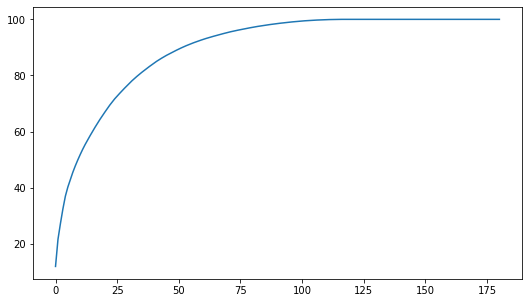

In [54]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

In [55]:
# doing pca with 70 components as they explain about 95% of variance

pca = PCA(70)
x_train_pca = pca.fit_transform(x_train[num_columns_list])
x_train_pca.shape

(21030, 70)

In [56]:
sum(pca.explained_variance_ratio_)

0.9512004770696174

In [57]:
# adding categorical columns to x_train_pca
x_train_pca = np.concatenate((x_train_pca, x_train[cat_column_list_3]), axis=1)
x_train_pca.shape

(21030, 76)

In [58]:
# applying pca for test set also
x_test_pca = pca.transform(x_test[num_columns_list])
x_test_pca = np.concatenate((x_test_pca, x_test[cat_column_list_3]), axis=1)
x_test_pca.shape

(7011, 76)

### XGBoost Base Line Model

In [59]:
# function to calculate specificity which we need to optimise in this task
def specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn+fp)

In [60]:
import xgboost as xgb

# Model with default hyperparameters
model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
model

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=-1, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [61]:
model.fit(x_train_pca, y_train)

[20:32:46] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score
y_train_pred = model.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

array([[19286,     0],
       [    3,  1741]])

In [63]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

0.9991399082568808

In [64]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

1.0

In [65]:
# printing confusion for testing data
y_test_pred = model.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

array([[6272,  158],
       [ 389,  192]])

In [66]:
# roc_auc score for testing data
roc_auc_score(y_test, y_test_pred)

0.6529461993720271

In [67]:
# calculating specificity for testing data
specificity(y_test, y_test_pred)

0.9754276827371695

### XGBoost Hyperparameter Tuning

#### Random Search CV

In [68]:
from sklearn.model_selection import RandomizedSearchCV

model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

params = {
        'n_estimators' : [100, 200, 500, 750], # no of trees 
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 25

model_xgb = RandomizedSearchCV(model, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)

In [69]:
model_xgb.fit(x_train_pca, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[21:09:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [70]:
model = model_xgb.best_estimator_

In [71]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score
y_train_pred = model.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

array([[19257,    29],
       [  628,  1116]])

In [73]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

0.8192022877268961

In [74]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

0.9984963185730582

In [75]:
# printing confusion for testing data
y_test_pred = model.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

array([[6306,  124],
       [ 382,  199]])

In [76]:
# roc_auc score for testing data
roc_auc_score(y_test, y_test_pred)

0.6616141526782535

In [77]:
# calculating specificity for testing data
specificity(y_test, y_test_pred)

0.9807153965785381

#### Random Search CV with Pipeline

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

scale = StandardScaler()
pca   = PCA()
model = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

steps = [
    ("scale",scale),
    ("pca",pca),
    ("xgb",model)
]

pipeline = Pipeline(steps)

params = {
        'pca__n_components': [60, 80],
        'xgb__n_estimators' : [100, 200, 500, 750], # no of trees 
        'xgb__learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],  # eta
        'xgb__min_child_weight': [1, 5, 7, 10],
        'xgb__gamma': [0.1, 0.5, 1, 1.5, 5],
        'xgb__subsample': [0.6, 0.8, 1.0],
        'xgb__colsample_bytree': [0.6, 0.8, 1.0],
        'xgb__max_depth': [3, 4, 5, 10, 12]
        }

folds = 5

param_comb = 25

model_xgb_pipeline = RandomizedSearchCV(pipeline, param_distributions=params, n_iter=param_comb, scoring='roc_auc', 
                                   n_jobs=-1, cv=5, verbose=3, random_state=42)

In [84]:
model_xgb_pipeline.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


KeyboardInterrupt: 

In [79]:
model = model_xgb.best_estimator_

In [71]:
model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=750, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, roc_auc_score
y_train_pred = model.predict(x_train_pca)
confusion_matrix(y_train, y_train_pred)

array([[19257,    29],
       [  628,  1116]])

In [73]:
# roc_auc score for training data
roc_auc_score(y_train, y_train_pred)

0.8192022877268961

In [74]:
# calculating specificity for training data
specificity(y_train, y_train_pred)

0.9984963185730582

In [75]:
# printing confusion for testing data
y_test_pred = model.predict(x_test_pca)
confusion_matrix(y_test, y_test_pred)

array([[6306,  124],
       [ 382,  199]])

In [76]:
# roc_auc score for testing data
roc_auc_score(y_test, y_test_pred)

0.6616141526782535

In [77]:
# calculating specificity for testing data
specificity(y_test, y_test_pred)

0.9807153965785381